In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
from sklearn.datasets import load_boston

housing = load_boston()
dir(housing)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [42]:
#x = feature name (tax, crim, etc.)
x = pd.DataFrame(housing.data, columns = housing['feature_names'])
print(x.shape)
y = pd.DataFrame(housing.target, columns = ['target'])
print(y.shape)

(506, 13)
(506, 1)


In [44]:
data = pd.concat([x,y], axis=1)
data.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


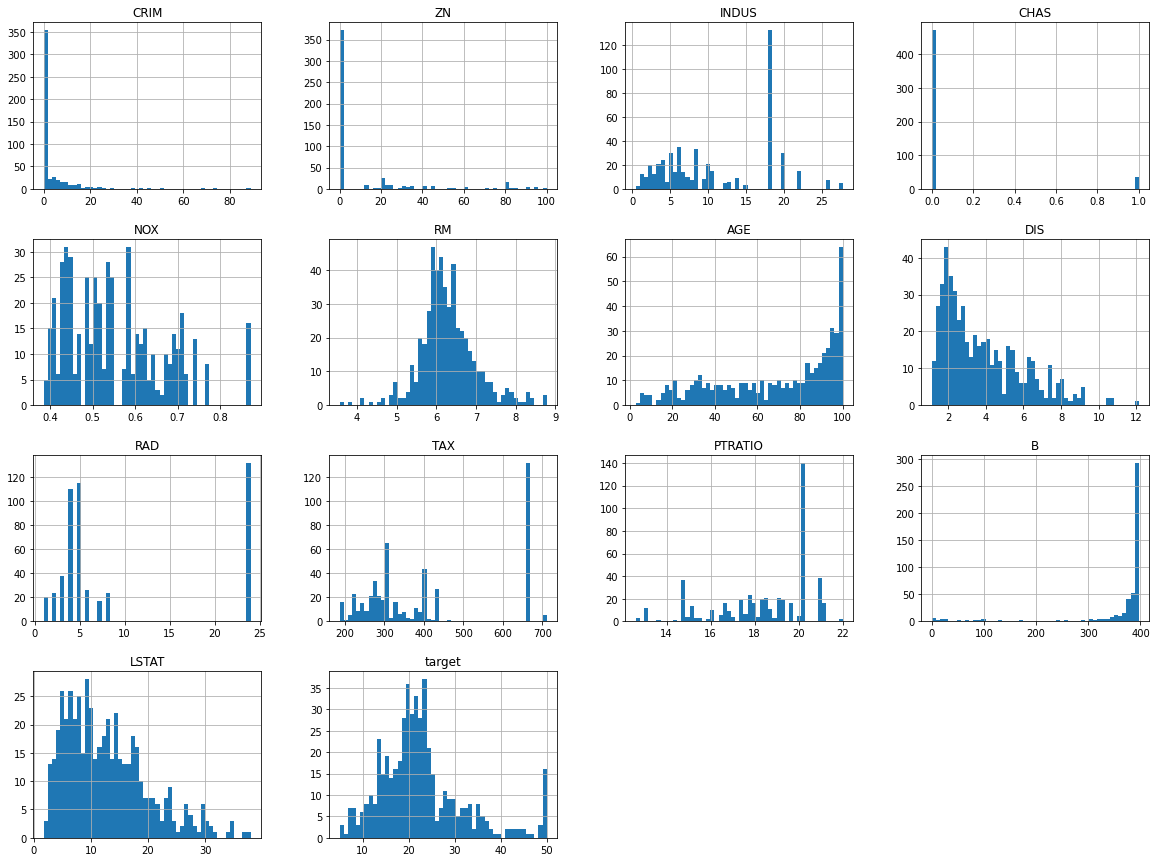

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

a = list(data.keys())
print(a)
x_data = data.loc[:,['CRIM', 'TAX']]
y_data = data.loc[:, 'target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']
(404, 2) (404,)
(102, 2) (102,)


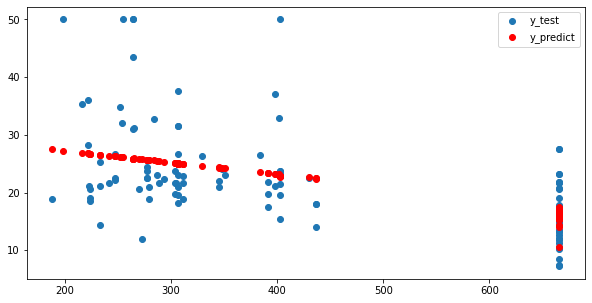

In [62]:
import seaborn as sns

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
plt.figure(figsize=(10,5))
plt.scatter(x_test['TAX'], y_test, label='y_test')
plt.scatter(x_test['TAX'], y_predict, c='r', label='y_predict')
plt.legend(loc='best')

plt.show()

In [23]:
tax =data.drop(['target'], axis=1)
list(tax)

t = tax.values #drop한 tax 항목의 값을 추출
print(t.shape)

y = data['TAX'].values #tax에 해당하는 key의 값을 추출
print(y.shape)

x_trian, x_test, y_train, y_test = train_test_split(t, y, train_size=0.8)

(506, 14)
(506,)


In [ ]:
'''
strat(계층화)하는 단계 목적

test set 중 특정 attribute가 다른 카테고리를 가장 잘 나타낸다고 했을때 해당 데이터를 이용해 전체 데이터를 분석하고자 함 
income_cat: 집값 예측하는데에 있어서 income이 중요하다고 했을때 새로운 카테고리 생성한거
    - median 어쩌구 그래서 넣어준거임 
    
    
    **내가 할 거 세금으로 새로운 카테고리 만들어서 세금 데이터 넣어주고 그걸로 집값 분석 plt 만들기
'''

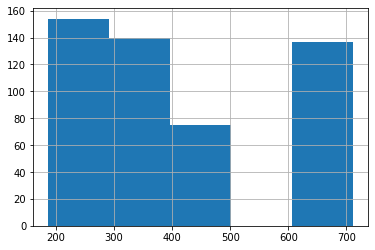

In [12]:
data['TAX'].hist(bins=5)
plt.show()

In [24]:
a = [0.,1.5, 3.0,4.5, 6., np.inf]

print('before:',data.shape)
b = list(data)
data['taxes'] = pd.cut(
    data['TAX'],
    bins=[0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5]
)

print(b)

before: (506, 15)
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target', 'taxes']


In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

rest = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in rest.split(data, data['TAX']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [110]:
data['CRIM'].shape

(506,)